## PLEASE NOTE THAT THIS FUCNTION WILL ONLY WORK IF YOUR DATASET IS FREE OF DATA QUALITY ISSUES, SUCH AS:
1. LETTERS INSIDE NUMBERS OF COLUMNS WITH NUMERIC VALUES
2. ? AND OTHER SIMBOLS INSIDE ROWS OF COLUMNS WITH NUMERIC VALUES
3. IMPROPER FORMATING OF COLUMNS WITH NUMERIC VALUES,
ETC


In [2]:

def outlier(data):
    
    counter = 0
    counter2 = 0
    counter3 = 1
    data_Dict = {}
    quantile_dict = {}
    
    #Creating the 25% and 75% quantile, I excluded the last column because that is the result column
    Q1 = [data[i].quantile([0.25]) for i in data.columns.values if i != data.columns.values[-1]]
    Q3 = [data[i].quantile([0.75]) for i in data.columns.values if i != data.columns.values[-1]]

    for i in range(len(Q1)):
        quantile_dict[Q1[i].name] = [float(Q3[i].values),float(Q1[i].values)]
    
    #Creating the Inter-quantile Range
    IQ_R = [value[0] - value[1] for value in quantile_dict.values()]
    
    #Creating the minimum and maximum thresold values
    out_liers = {'lower_outlier_thresold': [ float(Q1[i] - (IQ_R[i]*1.5)) for i in range(len(Q1))],
                 'upper_outlier_thresold': [ float(Q3[i] + (IQ_R[i]*1.5)) for i in range(len(Q1))]}
    
    columns = [i for i  in data.columns.values if i != data.columns.values[-1]]
    out_Data = pd.DataFrame(out_liers, index = columns)

    #Creating the new dataset without the outliers from the previous dataset
    for i in data.columns.values:
        if i != data.columns.values[-1]:

            min_edge = out_Data.iloc[:,counter][counter2]
            max_edge = out_Data.iloc[:,counter3][counter2]

            val = data[((data[i] >= min_edge) & (data[i] <= max_edge))]
            data_Dict[i] = val[i]
            counter2+=1
            
    df_2 = pd.DataFrame(data_Dict)
    df_2[data.columns.values[-1]] = data.iloc[:,-1]
    return(df_2)




In [1]:
df2 = outlier('Insert Data')
df2.head()

#### The new dataset created is free from the outliers of the previous dataset (based on the 1.5 rule), though when you plot a boxplot to confirm you might still see some columns with outliers. Don't be alarmed, the boxplot algorithm classified the end points of the new dataset as outliers although they are not outliers (this is based on the 1.5 rule). Construct your ML model and compare the results from before and after applying this function

## Please note that using this function will remove the outliers in your dataset but it might also create missing values in the new DataSet created. But this can be resolved by applying the KNN algorithm

## EXAMPLE USING THE FUNCTIION

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer


In [4]:
df = pd.read_csv(r'loan50.csv')

In [42]:
df.head()

,emp_length,term,annual_income,debt_to_income,total_credit_limit,total_credit_utilized,num_cc_carrying_balance,loan_amount,interest_rate,public_record_bankrupt,total_income
0,3.0,60,59000.0,0.557525,95131,32894,8,22000,10.90,0,59000.0
1,10.0,36,60000.0,1.305683,51929,78341,2,6000,9.92,1,60000.0
2,NaN,36,75000.0,1.056280,301373,79221,14,25000,26.30,0,75000.0
3,0.0,36,75000.0,0.574347,59890,43076,10,6000,9.92,0,75000.0
4,4.0,60,254000.0,0.238150,422619,60490,2,25000,9.43,0,254000.0


## Isolating the columns with numerical values

In [7]:
df = df[df.describe().columns]

In [8]:
df.head()

,emp_length,term,annual_income,debt_to_income,total_credit_limit,total_credit_utilized,num_cc_carrying_balance,loan_amount,interest_rate,public_record_bankrupt,total_income
0,3.0,60,59000.0,0.557525,95131,32894,8,22000,10.90,0,59000.0
1,10.0,36,60000.0,1.305683,51929,78341,2,6000,9.92,1,60000.0
2,NaN,36,75000.0,1.056280,301373,79221,14,25000,26.30,0,75000.0
3,0.0,36,75000.0,0.574347,59890,43076,10,6000,9.92,0,75000.0
4,4.0,60,254000.0,0.238150,422619,60490,2,25000,9.43,0,254000.0


In [66]:
df.describe()

,emp_length,term,annual_income,debt_to_income,total_credit_limit,total_credit_utilized,num_cc_carrying_balance,loan_amount,interest_rate,public_record_bankrupt,total_income
count,48.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4.895833,42.720000,86170.000000,0.722643,208546.640000,61546.540000,5.060000,17083.000000,11.567200,0.080000,105220.560000
std,3.520394,10.885377,57566.498371,0.958264,167514.864327,63778.074324,2.999388,10455.456343,5.052115,0.274048,68141.967716
min,0.000000,36.000000,28800.000000,0.054724,15980.000000,2872.000000,1.000000,3000.000000,5.310000,0.000000,28800.000000
25%,2.000000,36.000000,55750.000000,0.266424,70526.250000,25693.500000,3.000000,7125.000000,7.960000,0.000000,60000.000000
50%,5.000000,36.000000,74000.000000,0.540471,147363.500000,48005.500000,4.000000,15500.000000,9.930000,0.000000,78750.000000
75%,8.250000,60.000000,99500.000000,0.741217,299766.250000,76796.250000,6.000000,24000.000000,13.715000,0.000000,119000.000000
max,10.000000,60.000000,325000.000000,5.333729,793009.000000,373361.000000,14.000000,40000.000000,26.300000,1.000000,325000.000000


In [38]:
df.shape

(50, 11)

## Checking for missing values

In [63]:
df.isnull().sum()

emp_length                 2
term                       0
annual_income              0
debt_to_income             0
total_credit_limit         0
total_credit_utilized      0
num_cc_carrying_balance    0
loan_amount                0
interest_rate              0
public_record_bankrupt     0
total_income               0
dtype: int64

## Checking the distribution of the data before applying function

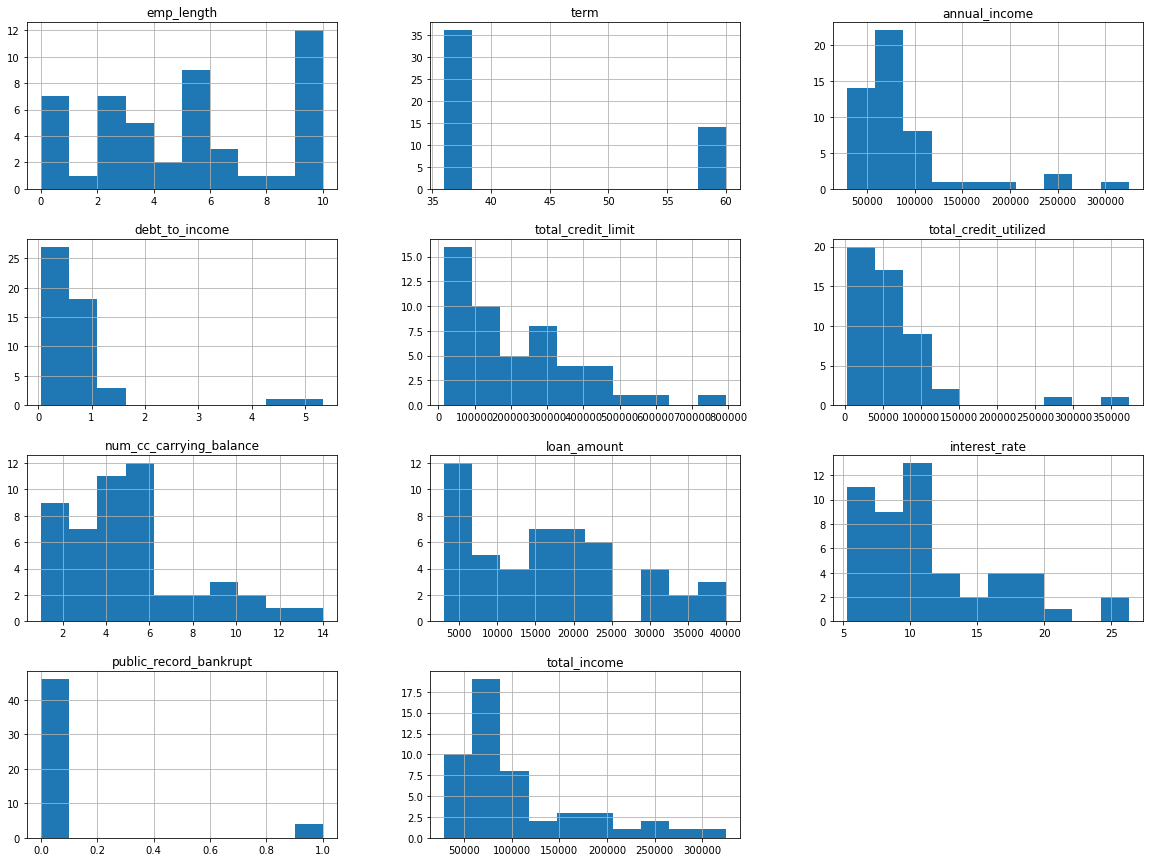

In [67]:
df.hist( figsize = (20,15));

## Looking at the outliers in the dataset





                                                                       Columns with Outliers









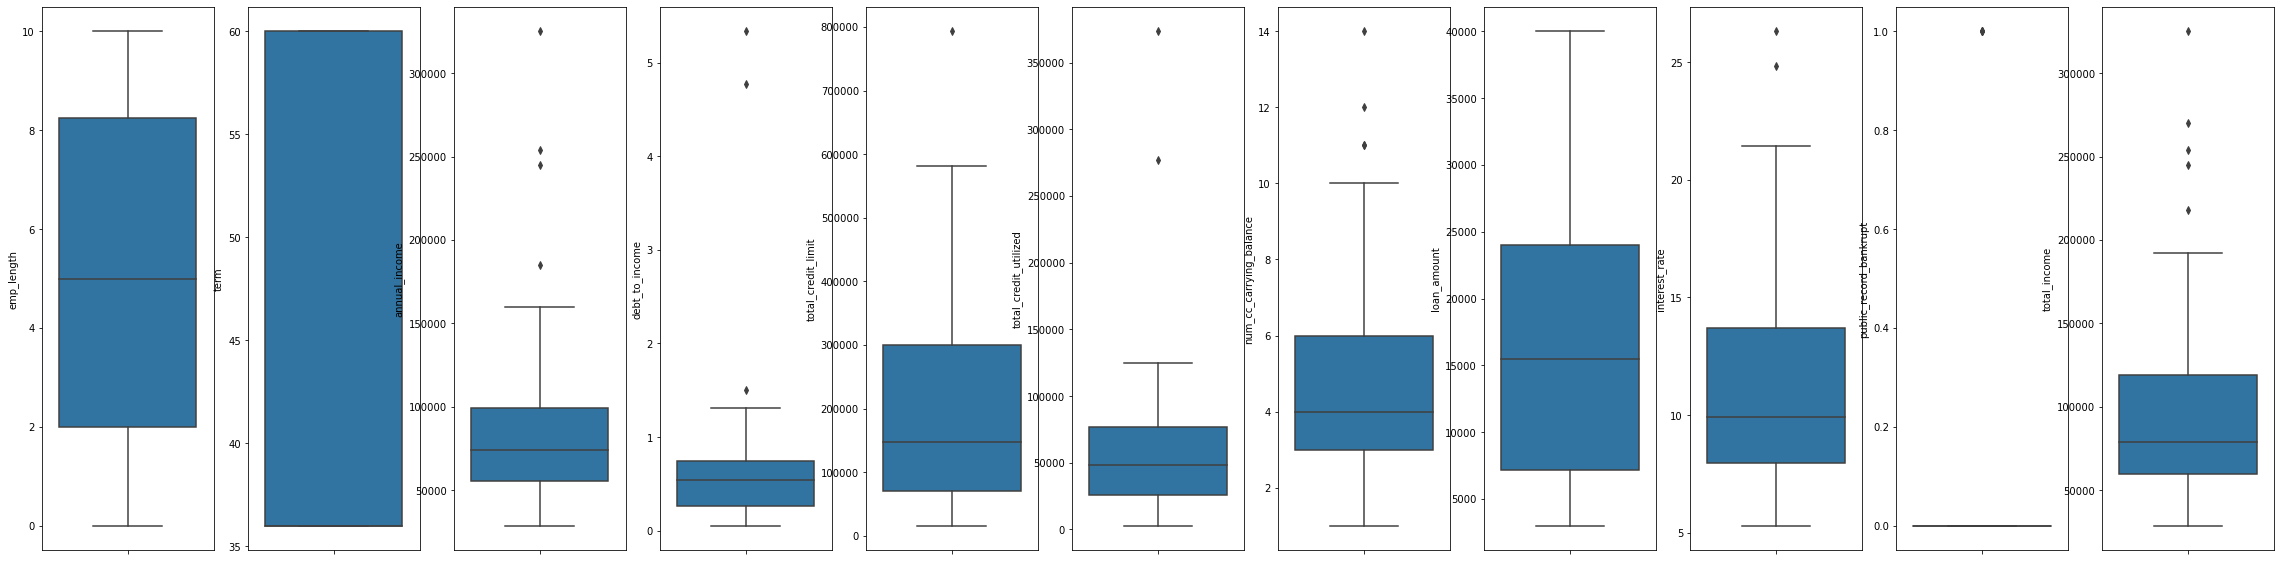

In [10]:
fig, axes = plt.subplots(1,11, figsize=(40, 10),squeeze=False)
axes = axes.flatten()
print('\n'*3)
print(' '*70, 'Columns with Outliers')
print('\n'*6)
for pl,col in enumerate(list(df.columns.values)):
    sns.boxplot(ax=axes[pl], data =df, y=col)

## Applying the function

In [12]:
df2 = outlier(df)
df2.head()

,emp_length,term,annual_income,debt_to_income,total_credit_limit,total_credit_utilized,num_cc_carrying_balance,loan_amount,interest_rate,public_record_bankrupt,total_income
0,3.0,60,59000.0,0.557525,95131.0,32894.0,8.0,22000,10.90,0.0,59000.0
1,10.0,36,60000.0,1.305683,51929.0,78341.0,2.0,6000,9.92,NaN,60000.0
2,NaN,36,75000.0,1.056280,301373.0,79221.0,NaN,25000,NaN,0.0,75000.0
3,0.0,36,75000.0,0.574347,59890.0,43076.0,10.0,6000,9.92,0.0,75000.0
4,4.0,60,NaN,0.238150,422619.0,60490.0,2.0,25000,9.43,0.0,254000.0


In [46]:
df2.shape

(50, 11)

## Checking for missing values

In [49]:
df2.isnull().sum()

emp_length                 2
term                       0
annual_income              4
debt_to_income             3
total_credit_limit         1
total_credit_utilized      2
num_cc_carrying_balance    4
loan_amount                0
interest_rate              2
public_record_bankrupt     4
total_income               0
dtype: int64

## Applying KNN to fix the missing values

In [52]:
knn = KNNImputer()

In [53]:
index1 = df2.index
columns = df2.columns.values

In [54]:
df2 = pd.DataFrame(knn.fit_transform(df2), columns = columns, index = index1)

In [55]:
df2.isnull().sum()

emp_length                 0
term                       0
annual_income              0
debt_to_income             0
total_credit_limit         0
total_credit_utilized      0
num_cc_carrying_balance    0
loan_amount                0
interest_rate              0
public_record_bankrupt     0
total_income               0
dtype: int64

In [61]:
df2.describe()

,emp_length,term,annual_income,debt_to_income,total_credit_limit,total_credit_utilized,num_cc_carrying_balance,loan_amount,interest_rate,public_record_bankrupt,total_income
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000
mean,4.904000,42.720000,73022.000000,0.527570,199478.060000,50004.080000,4.424000,17083.000000,10.928760,0.0,105220.560000
std,3.455192,10.885377,26384.026476,0.316746,146138.164481,32013.230408,2.155824,10455.456343,4.151299,0.0,68141.967716
min,0.000000,36.000000,28800.000000,0.054724,15980.000000,2872.000000,1.000000,3000.000000,5.310000,0.0,28800.000000
25%,2.000000,36.000000,55750.000000,0.266424,70526.250000,25693.500000,3.000000,7125.000000,7.960000,0.0,60000.000000
50%,5.000000,36.000000,72500.000000,0.517713,147363.500000,44348.500000,4.000000,15500.000000,9.920000,0.0,78750.000000
75%,7.750000,60.000000,86550.000000,0.728708,299766.250000,69143.750000,5.000000,24000.000000,12.620000,0.0,119000.000000
max,10.000000,60.000000,160000.000000,1.305683,581604.000000,124994.000000,10.000000,40000.000000,21.450000,0.0,325000.000000


## Checking the distribution of the data after applying function

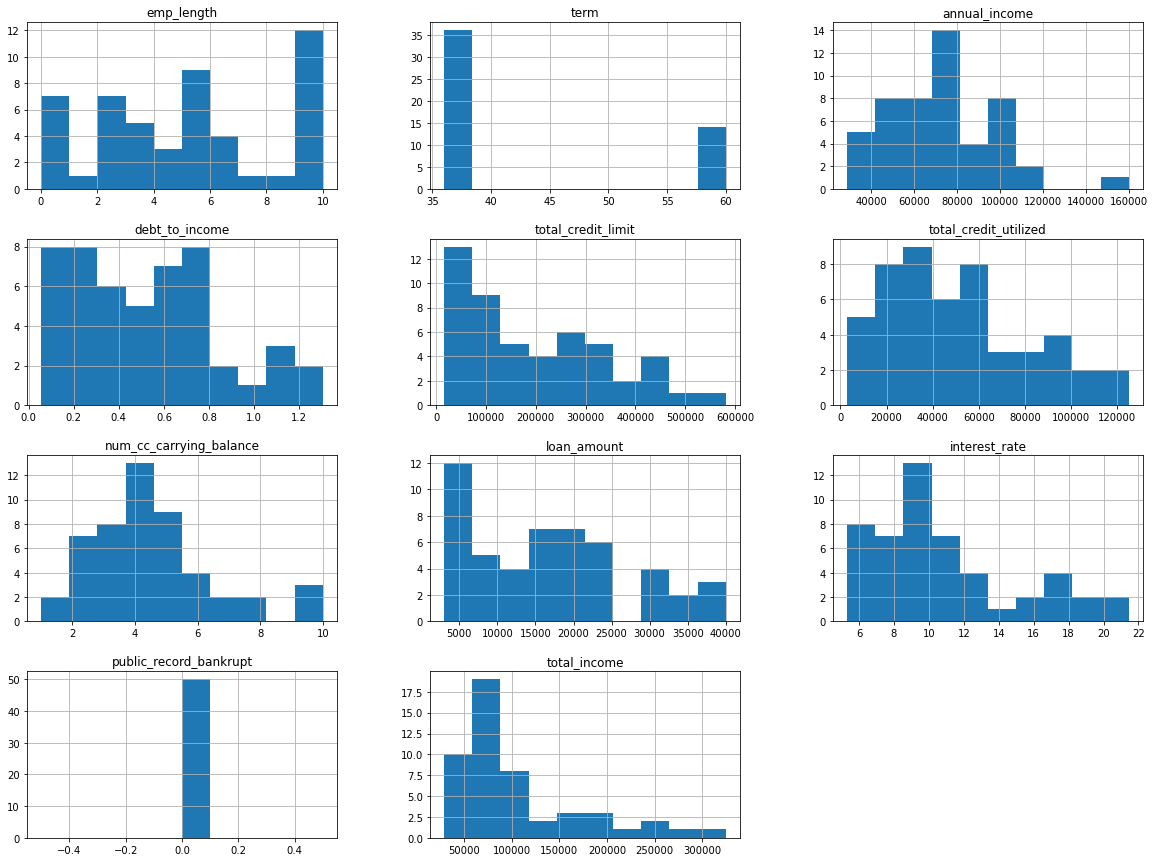

In [68]:
df2.hist( figsize = (20,15));

## Looking at how the function affected the outliers





                                                   Columns after applying function









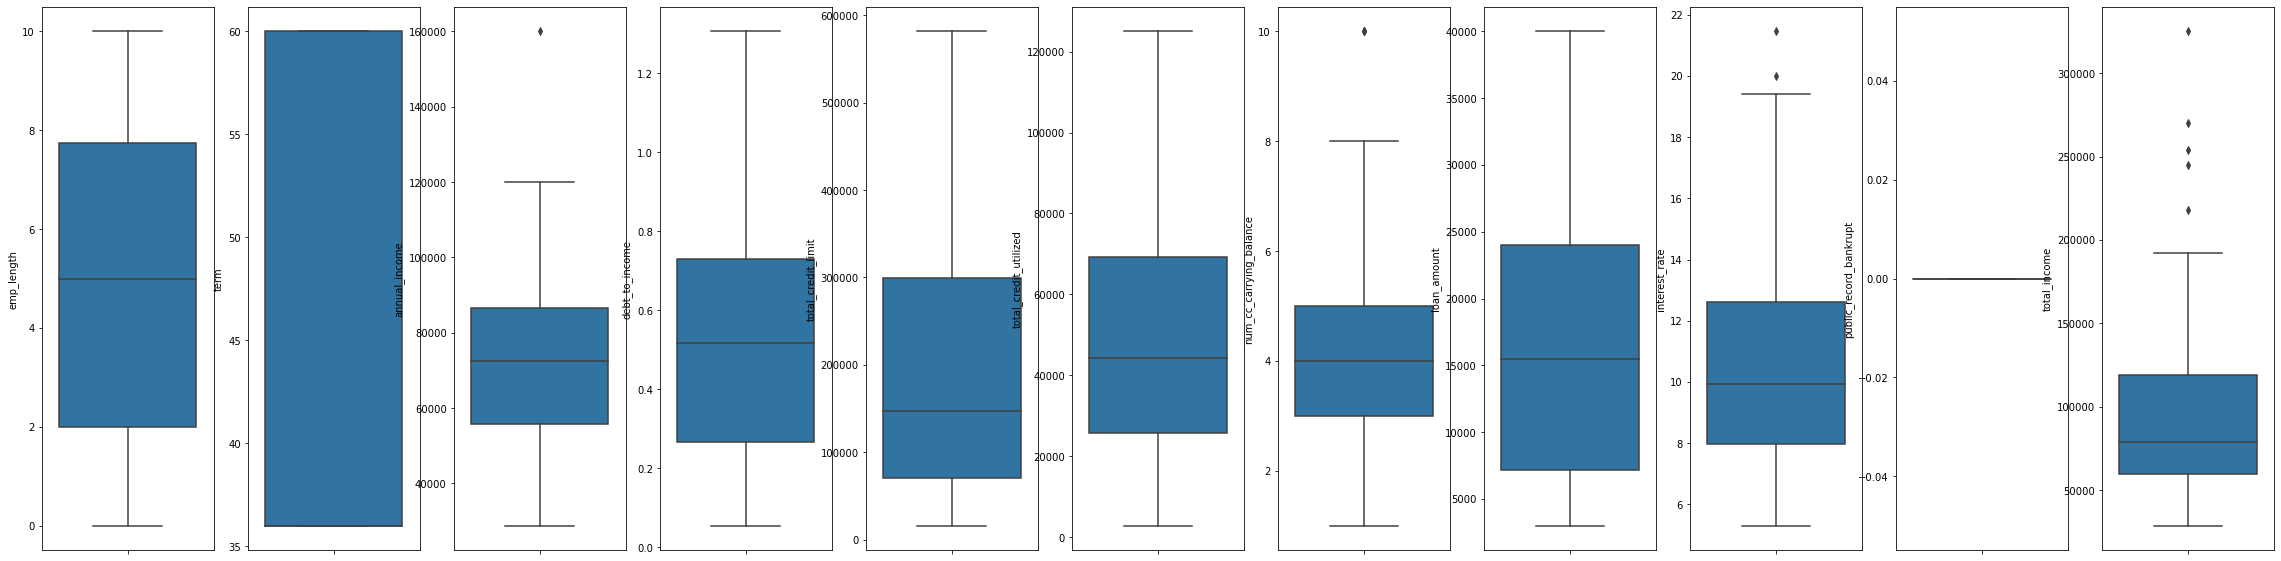

In [69]:
fig, axes = plt.subplots(1,11, figsize=(40, 10),squeeze=False)
axes = axes.flatten()
print('\n'*3)
print(' '*50, 'Columns after applying function')
print('\n'*6)
for pl,col in enumerate(list(df2.columns.values)):
    sns.boxplot(ax=axes[pl], data =df2, y=col)